<a href="https://colab.research.google.com/github/sakasa/notebooks/blob/master/tokyo_covid19_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U pip

     |████████████████████████████████| 1.5MB 12.4MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1


In [2]:
!pip install -U numpy

     |████████████████████████████████| 15.3 MB 149 kB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.4.1 requires numpy~=1.19.2, but you have numpy 1.20.1 which is incompatible.
jaxlib 0.1.60+cuda110 requires numpy<1.20,>=1.12, but you have numpy 1.20.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [3]:
!pip uninstall -y matplotlib

Found existing installation: matplotlib 3.2.2
Uninstalling matplotlib-3.2.2:
  Successfully uninstalled matplotlib-3.2.2


In [4]:
!pip install matplotlib==3.0.2

     |████████████████████████████████| 12.9 MB 9.0 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.6.0 requires matplotlib>=3.1.1, but you have matplotlib 3.0.2 which is incompatible.
mizani 0.6.0 requires matplotlib>=3.1.1, but you have matplotlib 3.0.2 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
!pip install -U pandas

In [5]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from pytz import timezone
import numpy as np
import seaborn as sns

%matplotlib inline

### Tokyo COVID19 Data
https://github.com/tokyo-metropolitan-gov/covid19

In [6]:
url = 'https://raw.githubusercontent.com/tokyo-metropolitan-gov/covid19/development/data/data.json'

In [7]:
response = requests.get(url)
print(response)
j_res = json.loads(response.text) # json文字列をdictへ
print(j_res.keys())
j_res['patients_summary']['data'][-15:]

<Response [200]>
dict_keys(['contacts', 'querents', 'patients_summary', 'inspections_summary', 'lastUpdate', 'main_summary'])


[{'小計': 275, '日付': '2021-02-23T08:00:00.000Z'},
 {'小計': 213, '日付': '2021-02-24T08:00:00.000Z'},
 {'小計': 340, '日付': '2021-02-25T08:00:00.000Z'},
 {'小計': 270, '日付': '2021-02-26T08:00:00.000Z'},
 {'小計': 337, '日付': '2021-02-27T08:00:00.000Z'},
 {'小計': 329, '日付': '2021-02-28T08:00:00.000Z'},
 {'小計': 121, '日付': '2021-03-01T08:00:00.000Z'},
 {'小計': 232, '日付': '2021-03-02T08:00:00.000Z'},
 {'小計': 316, '日付': '2021-03-03T08:00:00.000Z'},
 {'小計': 279, '日付': '2021-03-04T08:00:00.000Z'},
 {'小計': 301, '日付': '2021-03-05T08:00:00.000Z'},
 {'小計': 293, '日付': '2021-03-06T08:00:00.000Z'},
 {'小計': 237, '日付': '2021-03-07T08:00:00.000Z'},
 {'小計': 116, '日付': '2021-03-08T08:00:00.000Z'},
 {'小計': 290, '日付': '2021-03-09T08:00:00.000Z'}]

In [8]:
def utc_datestr_to_jst_date(datestr):
  #return datetime.datetime.fromisoformat(datestr.replace('Z', '+00:00')).astimezone(timezone('Asia/Tokyo'))
  # for ~Python3.6
  return datetime.datetime.strptime(datestr.split('.')[0].replace('-', '').replace(':', ''), '%Y%m%dT%H%M%S').astimezone(timezone('Asia/Tokyo'))

In [9]:
keys = ['contacts', 'querents', 'patients_summary']

In [10]:
d = j_res
df = pd.DataFrame()
for key in keys:
  k = f'{key.split("_")[0]}_count'
  for v in d[key].values():
    if type(v) is list:
      index = [_v['日付'] for _v in v]
      tmp_df = pd.DataFrame(_v for _v in v)
      tmp_df.index = [utc_datestr_to_jst_date(dt) for dt in tmp_df['日付']]
      tmp_df[k] = tmp_df['小計']
  df = pd.concat([df, tmp_df[k]], axis=1)
df = df.fillna(0).astype('int64')
df.index = [i for i in df.index]
df['datetime'] = df.index
df

,contacts_count,querents_count,patients_count,datetime
2020-01-24 17:00:00+09:00,0,0,1,2020-01-24 17:00:00+09:00
2020-01-25 17:00:00+09:00,0,0,1,2020-01-25 17:00:00+09:00
2020-01-26 17:00:00+09:00,0,0,0,2020-01-26 17:00:00+09:00
2020-01-27 17:00:00+09:00,0,0,0,2020-01-27 17:00:00+09:00
2020-01-28 17:00:00+09:00,0,0,0,2020-01-28 17:00:00+09:00
...,...,...,...,...
2021-03-05 17:00:00+09:00,246,0,301,2021-03-05 17:00:00+09:00
2021-03-06 17:00:00+09:00,243,0,293,2021-03-06 17:00:00+09:00
2021-03-07 17:00:00+09:00,192,0,237,2021-03-07 17:00:00+09:00
2021-03-08 17:00:00+09:00,277,0,116,2021-03-08 17:00:00+09:00


In [11]:
# 7日移動平均
df1 = df
for key in keys:
  k = key.split('_')[0]
  df1[f'{k}_7d_mov_ave'] = df[f'{k}_count'].rolling('7D').mean()
  # df1[f'{k}_7d_mov_center_ave'] = df[f'{k}_count'].rolling(7, center=True).mean()
  df1[f'{k}_7d_mov_sum'] = df[f'{k}_count'].rolling('7D').sum()
df1.tail()

,contacts_count,querents_count,patients_count,datetime,contacts_7d_mov_ave,contacts_7d_mov_sum,querents_7d_mov_ave,querents_7d_mov_sum,patients_7d_mov_ave,patients_7d_mov_sum
2021-03-05 17:00:00+09:00,246,0,301,2021-03-05 17:00:00+09:00,237.571429,1663.0,0.0,0.0,273.571429,1915.0
2021-03-06 17:00:00+09:00,243,0,293,2021-03-06 17:00:00+09:00,229.857143,1609.0,0.0,0.0,267.285714,1871.0
2021-03-07 17:00:00+09:00,192,0,237,2021-03-07 17:00:00+09:00,227.142857,1590.0,0.0,0.0,254.142857,1779.0
2021-03-08 17:00:00+09:00,277,0,116,2021-03-08 17:00:00+09:00,228.714286,1601.0,0.0,0.0,253.428571,1774.0
2021-03-09 17:00:00+09:00,0,0,290,2021-03-09 17:00:00+09:00,198.714286,1391.0,0.0,0.0,261.714286,1832.0


In [12]:
df2 = df1
# 日付が年の何週目かを列にセット `'{yy}w{week nnum}`
df2['week_num'] = [f'\'{d.strftime("%y")}w{d.strftime("%V")}' for d in df1.index]
# 曜日の列をセット
df2['week_day'] = [d.strftime('%a') for d in df1.index]
df2.tail(15)

,contacts_count,querents_count,patients_count,datetime,contacts_7d_mov_ave,contacts_7d_mov_sum,querents_7d_mov_ave,querents_7d_mov_sum,patients_7d_mov_ave,patients_7d_mov_sum,week_num,week_day
2021-02-23 17:00:00+09:00,235,0,275,2021-02-23 17:00:00+09:00,237.142857,1660.0,0.0,0.0,318.285714,2228.0,'21w08,Tue
2021-02-24 17:00:00+09:00,237,0,213,2021-02-24 17:00:00+09:00,236.571429,1656.0,0.0,0.0,294.714286,2063.0,'21w08,Wed
2021-02-25 17:00:00+09:00,213,0,340,2021-02-25 17:00:00+09:00,236.000000,1652.0,0.0,0.0,279.714286,1958.0,'21w08,Thu
2021-02-26 17:00:00+09:00,213,0,270,2021-02-26 17:00:00+09:00,237.857143,1665.0,0.0,0.0,267.857143,1875.0,'21w08,Fri
2021-02-27 17:00:00+09:00,297,0,337,2021-02-27 17:00:00+09:00,242.571429,1698.0,0.0,0.0,269.285714,1885.0,'21w08,Sat
2021-02-28 17:00:00+09:00,211,0,329,2021-02-28 17:00:00+09:00,238.571429,1670.0,0.0,0.0,277.428571,1942.0,'21w08,Sun
2021-03-01 17:00:00+09:00,266,0,121,2021-03-01 17:00:00+09:00,238.857143,1672.0,0.0,0.0,269.285714,1885.0,'21w09,Mon
2021-03-02 17:00:00+09:00,210,0,232,2021-03-02 17:00:00+09:00,235.285714,1647.0,0.0,0.0,263.142857,1842.0,'21w09,Tue
2021-03-03 17:00:00+09:00,201,0,316,2021-03-03 17:00:00+09:00,230.142857,1611.0,0.0,0.0,277.857143,1945.0,'21w09,Wed
2021-03-04 17:00:00+09:00,232,0,279,2021-03-04 17:00:00+09:00,232.857143,1630.0,0.0,0.0,269.142857,1884.0,'21w09,Thu


In [13]:
# 週毎に集計
groupby_week_num = df2.groupby('week_num', as_index=True)

In [14]:
# 集計結果から平均と合計を取得しデータフレームにセット
patients_week_num_df = pd.DataFrame({
    # 'patients_week_num': df2['week_num'].unique(),
    'patients_week_mean': [m for m in groupby_week_num.agg({'patients_count': 'mean'})['patients_count']], 
    'patients_week_sum': [s for s in groupby_week_num.agg({'patients_count': 'sum'})['patients_count']]
  }, index=[d for d in groupby_week_num.agg({'datetime': 'max'})['datetime']])
patients_week_num_df.tail()

,patients_week_mean,patients_week_sum
2021-02-21 17:00:00+09:00,341.571429,2391
2021-02-28 17:00:00+09:00,277.428571,1942
2021-03-07 17:00:00+09:00,254.142857,1779
2021-03-09 17:00:00+09:00,203.000000,406
2021-01-03 17:00:00+09:00,816.000000,2448


In [15]:
df3 = pd.concat([
                df2,
                patients_week_num_df.loc[:, ['patients_week_mean', 'patients_week_sum']]
                ], axis=1)
df3.tail(15)

,contacts_count,querents_count,patients_count,datetime,contacts_7d_mov_ave,contacts_7d_mov_sum,querents_7d_mov_ave,querents_7d_mov_sum,patients_7d_mov_ave,patients_7d_mov_sum,week_num,week_day,patients_week_mean,patients_week_sum
2021-02-23 17:00:00+09:00,235,0,275,2021-02-23 17:00:00+09:00,237.142857,1660.0,0.0,0.0,318.285714,2228.0,'21w08,Tue,NaN,NaN
2021-02-24 17:00:00+09:00,237,0,213,2021-02-24 17:00:00+09:00,236.571429,1656.0,0.0,0.0,294.714286,2063.0,'21w08,Wed,NaN,NaN
2021-02-25 17:00:00+09:00,213,0,340,2021-02-25 17:00:00+09:00,236.000000,1652.0,0.0,0.0,279.714286,1958.0,'21w08,Thu,NaN,NaN
2021-02-26 17:00:00+09:00,213,0,270,2021-02-26 17:00:00+09:00,237.857143,1665.0,0.0,0.0,267.857143,1875.0,'21w08,Fri,NaN,NaN
2021-02-27 17:00:00+09:00,297,0,337,2021-02-27 17:00:00+09:00,242.571429,1698.0,0.0,0.0,269.285714,1885.0,'21w08,Sat,NaN,NaN
2021-02-28 17:00:00+09:00,211,0,329,2021-02-28 17:00:00+09:00,238.571429,1670.0,0.0,0.0,277.428571,1942.0,'21w08,Sun,277.428571,1942.0
2021-03-01 17:00:00+09:00,266,0,121,2021-03-01 17:00:00+09:00,238.857143,1672.0,0.0,0.0,269.285714,1885.0,'21w09,Mon,NaN,NaN
2021-03-02 17:00:00+09:00,210,0,232,2021-03-02 17:00:00+09:00,235.285714,1647.0,0.0,0.0,263.142857,1842.0,'21w09,Tue,NaN,NaN
2021-03-03 17:00:00+09:00,201,0,316,2021-03-03 17:00:00+09:00,230.142857,1611.0,0.0,0.0,277.857143,1945.0,'21w09,Wed,NaN,NaN
2021-03-04 17:00:00+09:00,232,0,279,2021-03-04 17:00:00+09:00,232.857143,1630.0,0.0,0.0,269.142857,1884.0,'21w09,Thu,NaN,NaN


### グラフ出力

In [16]:
sns.set()
sns.set_style('whitegrid')

In [17]:
### 日毎の数
x = df3.index
y1_1 = df3['patients_count']
y1_2 = df3['patients_7d_mov_ave']
#y1_3 = df3['patients_7d_mov_center_ave']
# y1_4 = df3['patients_week_mean']

In [18]:
### 週毎の数
# y2_1 = df3['patients_7d_mov_sum']
# y2_2 = df3['patients_week_sum']

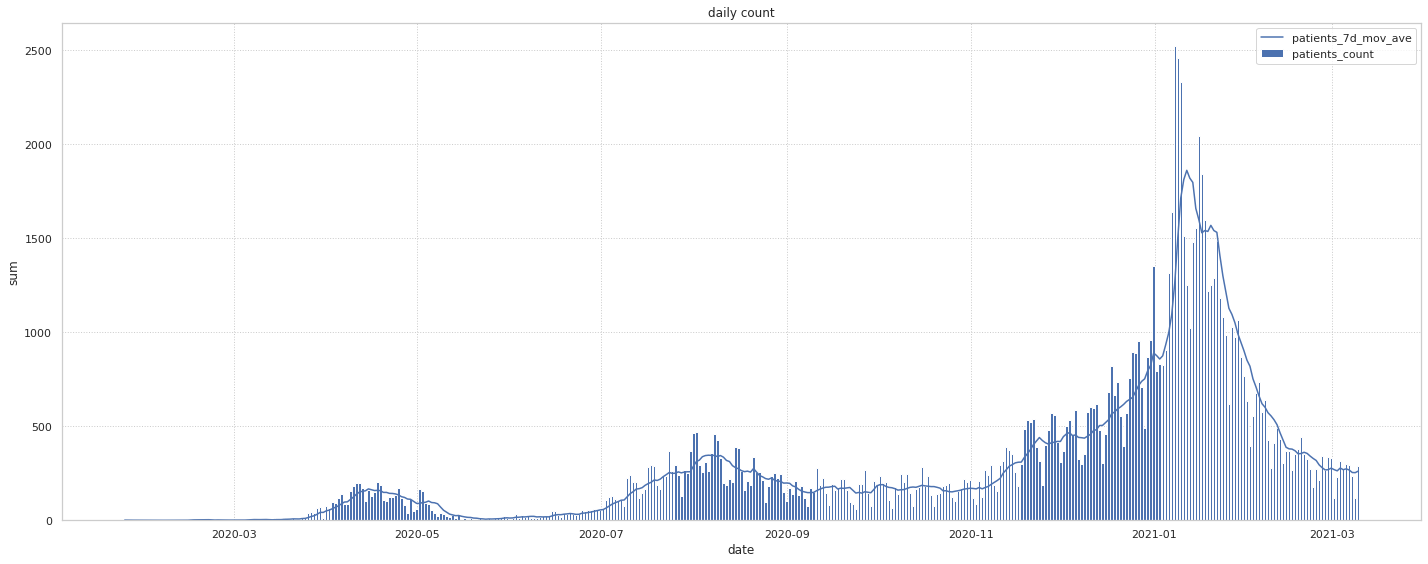

In [19]:
fig, ax = plt.subplots(1,1, figsize=(20, 8))

### 日毎の数
ax.set_title('daily count')
ax.set_xlabel('date')
ax.set_ylabel('sum')
ax.bar(x, y1_1, label='patients_count')
ax.plot(x, y1_2, label='patients_7d_mov_ave')
#ax[0].plot(x, y1_3, label='patients_7d_mov_center_ave')
# ax[0].bar(x, y1_4, label='patients_week_mean')
ax.grid(linestyle=':')
ax.legend()

# ### 週毎の合計
# ax[1].set_title('weekly count')
# ax[1].set_xlabel('date')
# ax[1].set_ylabel('sum')
# ax[1].plot(x, y2_1, label='patients_7d_mov_sum')
# ax[1].bar(x, y2_2, label='patients_week_sum')
# ax[1].grid(linestyle=':')
# ax[1].legend()

plt.tight_layout()

---

In [20]:
def get_date(d: datetime) -> datetime:
  """時間が入った `datetime` を `%Y-%m-%d 00:00:00` の `datetime` に変換します"""
  return datetime.datetime.strptime(d.strftime('%Y-%m-%d'), '%Y-%m-%d')

In [21]:
em_start = datetime.datetime(2020, 4, 7)
em_end = datetime.datetime(2020, 5, 25)
def em_term() -> list:
  """緊急事態宣言期間の日付のリスト"""
  em_term = []
  for i in range((em_end - em_start).days + 1):
    em_term.append(em_start + datetime.timedelta(i))
  return em_term

In [22]:
def emergency(d: datetime) -> int:
  """緊急事態宣言期間中か"""
  return int(get_date(d) in em_term())

In [23]:
def em_passed(d: datetime) -> int:
  """緊急事態宣言から経過日数"""
  d = get_date(d)
  return (d - em_start).days if em_start < d else 0

In [24]:
ds_df = pd.DataFrame({
    'timestamp': [d.timestamp() for d in df3.index], # タイムスタンプ
    'year': np.array(df3.index.strftime('%Y'), dtype=np.int64), # 年
    'month': np.array(df3.index.strftime('%m'), dtype=np.int64), # 月
    'day': np.array(df3.index.strftime('%d'), dtype=np.int64), # 日
    'week_day': df3['week_day'], # 曜日
})
# 曜日をダミー変数化
ds_df = pd.concat([ds_df, pd.get_dummies(ds_df['week_day'])], axis=1)
ds_df = ds_df.drop(columns=['week_day'])

# 経過日数
# ds_df['passed'] = [(d - df3['datetime'][0]).days for d in df3['datetime']]
ds_df['passed'] = [(d - df3.index[0]).days for d in df3.index]
# 緊急事態宣言期間中
ds_df['emergency'] = [emergency(d) for d in df3.index]
# 緊急事態宣言経過日数
ds_df['em_passed'] = [em_passed(d) for d in df3.index]
for key in keys:
  k = key.split('_')[0]
  # 日毎の数
  ds_df[f'{k}_count'] = df3[f'{k}_count']
  # 7日間移動平均
  ds_df[f'{k}_7d_mov_ave'] = df3[f'{k}_7d_mov_ave']
  #ds_df[f'{k}_7d_mov_center_ave'] = df3[f'{k}_7d_mov_center_ave']
  # 7日間移動合計
  ds_df[f'{k}_7d_mov_sum'] = df3[f'{k}_7d_mov_sum']

# 日毎の数
# ds_df['patients_count'] = df3['patients_count']
# 7日間移動平均
# ds_df['patients_7d_mov_ave'] = df3['patients_7d_mov_ave']
#ds_df['7d_mov_center_ave'] = df3['patients_7d_mov_center_ave']
# 7日間移動合計
# ds_df['patients_7d_mov_sum'] = df3['patients_7d_mov_sum']

ds_df = ds_df.reset_index(drop=True)
ds_df.tail(15)

,timestamp,year,month,day,Fri,Mon,Sat,Sun,Thu,Tue,Wed,passed,emergency,em_passed,contacts_count,contacts_7d_mov_ave,contacts_7d_mov_sum,querents_count,querents_7d_mov_ave,querents_7d_mov_sum,patients_count,patients_7d_mov_ave,patients_7d_mov_sum
396,1.614067e+09,2021,2,23,0,0,0,0,0,1,0,396,0,322,235,237.142857,1660.0,0,0.0,0.0,275,318.285714,2228.0
397,1.614154e+09,2021,2,24,0,0,0,0,0,0,1,397,0,323,237,236.571429,1656.0,0,0.0,0.0,213,294.714286,2063.0
398,1.614240e+09,2021,2,25,0,0,0,0,1,0,0,398,0,324,213,236.000000,1652.0,0,0.0,0.0,340,279.714286,1958.0
399,1.614326e+09,2021,2,26,1,0,0,0,0,0,0,399,0,325,213,237.857143,1665.0,0,0.0,0.0,270,267.857143,1875.0
400,1.614413e+09,2021,2,27,0,0,1,0,0,0,0,400,0,326,297,242.571429,1698.0,0,0.0,0.0,337,269.285714,1885.0
401,1.614499e+09,2021,2,28,0,0,0,1,0,0,0,401,0,327,211,238.571429,1670.0,0,0.0,0.0,329,277.428571,1942.0
402,1.614586e+09,2021,3,1,0,1,0,0,0,0,0,402,0,328,266,238.857143,1672.0,0,0.0,0.0,121,269.285714,1885.0
403,1.614672e+09,2021,3,2,0,0,0,0,0,1,0,403,0,329,210,235.285714,1647.0,0,0.0,0.0,232,263.142857,1842.0
404,1.614758e+09,2021,3,3,0,0,0,0,0,0,1,404,0,330,201,230.142857,1611.0,0,0.0,0.0,316,277.857143,1945.0
405,1.614845e+09,2021,3,4,0,0,0,0,1,0,0,405,0,331,232,232.857143,1630.0,0,0.0,0.0,279,269.142857,1884.0


In [25]:
ds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            411 non-null    float64
 1   year                 411 non-null    int64  
 2   month                411 non-null    int64  
 3   day                  411 non-null    int64  
 4   Fri                  411 non-null    uint8  
 5   Mon                  411 non-null    uint8  
 6   Sat                  411 non-null    uint8  
 7   Sun                  411 non-null    uint8  
 8   Thu                  411 non-null    uint8  
 9   Tue                  411 non-null    uint8  
 10  Wed                  411 non-null    uint8  
 11  passed               411 non-null    int64  
 12  emergency            411 non-null    int64  
 13  em_passed            411 non-null    int64  
 14  contacts_count       411 non-null    int64  
 15  contacts_7d_mov_ave  411 non-null    flo

In [26]:
ds_df.describe()

,timestamp,year,month,day,Fri,Mon,Sat,Sun,Thu,Tue,Wed,passed,emergency,em_passed,contacts_count,contacts_7d_mov_ave,contacts_7d_mov_sum,querents_count,querents_7d_mov_ave,querents_7d_mov_sum,patients_count,patients_7d_mov_ave,patients_7d_mov_sum
count,4.110000e+02,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.00000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000
mean,1.597565e+09,2020.165450,6.021898,15.664234,0.143552,0.143552,0.143552,0.143552,0.141119,0.143552,0.141119,205.00000,0.119221,137.751825,716.773723,715.521666,5008.642336,896.639903,896.639903,6276.479319,277.034063,275.292075,1927.004866
std,1.026343e+07,0.372039,3.556102,8.907610,0.351063,0.351063,0.351063,0.351063,0.348569,0.351063,0.348569,118.78973,0.324444,109.342812,461.223326,446.987705,3128.928828,882.285478,773.184657,5412.292599,377.532940,358.229223,2507.635050
min,1.579853e+09,2020.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.588709e+09,2020.000000,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,102.50000,0.000000,28.500000,412.500000,431.857143,3023.000000,0.000000,0.000000,0.000000,34.500000,32.357143,226.500000
50%,1.597565e+09,2020.000000,6.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,205.00000,0.000000,131.000000,575.000000,588.857143,4122.000000,889.000000,1013.714286,7096.000000,171.000000,169.571429,1187.000000
75%,1.606421e+09,2020.000000,9.000000,23.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,307.50000,0.000000,233.500000,874.500000,893.785714,6256.500000,1480.500000,1463.928571,10247.500000,327.500000,334.785714,2343.500000
max,1.615277e+09,2021.000000,12.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,410.00000,1.000000,336.000000,2265.000000,2096.857143,14678.000000,4060.000000,2574.142857,18019.000000,2520.000000,1861.142857,13028.000000


In [27]:
ds_df.corr()

,timestamp,year,month,day,Fri,Mon,Sat,Sun,Thu,Tue,Wed,passed,emergency,em_passed,contacts_count,contacts_7d_mov_ave,contacts_7d_mov_sum,querents_count,querents_7d_mov_ave,querents_7d_mov_sum,patients_count,patients_7d_mov_ave,patients_7d_mov_sum
timestamp,1.000000e+00,0.643608,0.288125,-0.022027,-0.006901,0.003451,-0.003451,1.260867e-18,0.001708,0.006901,-0.001708,1.000000e+00,-0.331801,0.992254,-0.190518,-0.160901,-0.160896,-0.392825,-0.418896,-0.418896,0.623992,0.668621,0.668640
year,6.436083e-01,1.000000,-0.544747,-0.086969,0.004453,0.004453,0.004453,4.452739e-03,-0.011211,0.004453,-0.011211,6.436083e-01,-0.163814,0.671687,-0.159006,-0.117286,-0.117284,-0.453049,-0.516977,-0.516977,0.602748,0.677171,0.677170
month,2.881250e-01,-0.544747,1.000000,0.002620,-0.014246,-0.000570,-0.010339,-6.431517e-03,0.015210,0.003337,0.013242,2.881250e-01,-0.156589,0.244014,-0.007185,-0.027175,-0.027170,0.138755,0.192034,0.192034,-0.073677,-0.119217,-0.119193
day,-2.202684e-02,-0.086969,0.002620,1.000000,0.013111,-0.014187,0.010771,9.991415e-03,0.009014,-0.015747,-0.012981,-2.202684e-02,0.001226,-0.021231,-0.002425,-0.001213,-0.001217,0.019314,0.002885,0.002885,-0.008804,0.001262,0.001245
Fri,-6.901361e-03,0.004453,-0.014246,0.013111,1.000000,-0.167614,-0.167614,-1.676136e-01,-0.165952,-0.167614,-0.165952,-6.901361e-03,-0.000729,-0.005551,-0.019803,-0.003616,-0.003615,0.040949,-0.002302,-0.002302,0.048932,-0.002118,-0.002129
Mon,3.450681e-03,0.004453,-0.000570,-0.014187,-0.167614,1.000000,-0.167614,-1.676136e-01,-0.165952,-0.167614,-0.165952,3.450681e-03,-0.000729,0.003599,0.040330,-0.002035,-0.002034,0.167870,-0.002302,-0.002302,-0.107379,-0.000341,-0.000339
Sat,-3.450681e-03,0.004453,-0.010339,0.010771,-0.167614,-0.167614,1.000000,-1.676136e-01,-0.165952,-0.167614,-0.165952,-3.450681e-03,-0.000729,-0.002501,0.047635,-0.003076,-0.003075,-0.198120,-0.002302,-0.002302,0.053441,-0.001309,-0.001317
Sun,1.260867e-18,0.004453,-0.006432,0.009991,-0.167614,-0.167614,-0.167614,1.000000e+00,-0.165952,-0.167614,-0.165952,3.116766e-18,-0.000729,0.000549,-0.017694,-0.002650,-0.002649,-0.182694,-0.002302,-0.002302,-0.032481,-0.000659,-0.000660
Thu,1.708232e-03,-0.011211,0.015210,0.009014,-0.165952,-0.165952,-0.165952,-1.659516e-01,1.000000,-0.165952,-0.164306,1.708232e-03,0.001837,0.000153,-0.006628,0.007009,0.007010,0.054999,0.005796,0.005796,0.075972,0.002387,0.002393
Tue,6.901361e-03,0.004453,0.003337,-0.015747,-0.167614,-0.167614,-0.167614,-1.676136e-01,-0.165952,1.000000,-0.165952,6.901361e-03,-0.000729,0.006649,-0.031643,-0.002035,-0.002034,0.065762,-0.002302,-0.002302,-0.037578,0.000460,0.000465


---

In [28]:
ds_df.columns

Index(['timestamp', 'year', 'month', 'day', 'Fri', 'Mon', 'Sat', 'Sun', 'Thu',
       'Tue', 'Wed', 'passed', 'emergency', 'em_passed', 'contacts_count',
       'contacts_7d_mov_ave', 'contacts_7d_mov_sum', 'querents_count',
       'querents_7d_mov_ave', 'querents_7d_mov_sum', 'patients_count',
       'patients_7d_mov_ave', 'patients_7d_mov_sum'],
      dtype='object')

In [29]:
_df = ds_df.copy()
_df = _df.drop(['year', 'month', 'day', 
          'contacts_7d_mov_ave', 'contacts_7d_mov_sum', 
          'querents_7d_mov_ave', 'querents_7d_mov_sum', 
          ], axis=1)
_df

,timestamp,Fri,Mon,Sat,Sun,Thu,Tue,Wed,passed,emergency,em_passed,contacts_count,querents_count,patients_count,patients_7d_mov_ave,patients_7d_mov_sum
0,1.579853e+09,1,0,0,0,0,0,0,0,0,0,0,0,1,1.000000,1.0
1,1.579939e+09,0,0,1,0,0,0,0,1,0,0,0,0,1,1.000000,2.0
2,1.580026e+09,0,0,0,1,0,0,0,2,0,0,0,0,0,0.666667,2.0
3,1.580112e+09,0,1,0,0,0,0,0,3,0,0,0,0,0,0.500000,2.0
4,1.580198e+09,0,0,0,0,0,1,0,4,0,0,0,0,0,0.400000,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,1.614931e+09,1,0,0,0,0,0,0,406,0,332,246,0,301,273.571429,1915.0
407,1.615018e+09,0,0,1,0,0,0,0,407,0,333,243,0,293,267.285714,1871.0
408,1.615104e+09,0,0,0,1,0,0,0,408,0,334,192,0,237,254.142857,1779.0
409,1.615190e+09,0,1,0,0,0,0,0,409,0,335,277,0,116,253.428571,1774.0


In [30]:
_df2 = _df[['timestamp', 'passed', 'emergency', 'patients_count', 'patients_7d_mov_ave', 'patients_7d_mov_sum']]
_df2

,timestamp,passed,emergency,patients_count,patients_7d_mov_ave,patients_7d_mov_sum
0,1.579853e+09,0,0,1,1.000000,1.0
1,1.579939e+09,1,0,1,1.000000,2.0
2,1.580026e+09,2,0,0,0.666667,2.0
3,1.580112e+09,3,0,0,0.500000,2.0
4,1.580198e+09,4,0,0,0.400000,2.0
...,...,...,...,...,...,...
406,1.614931e+09,406,0,301,273.571429,1915.0
407,1.615018e+09,407,0,293,267.285714,1871.0
408,1.615104e+09,408,0,237,254.142857,1779.0
409,1.615190e+09,409,0,116,253.428571,1774.0


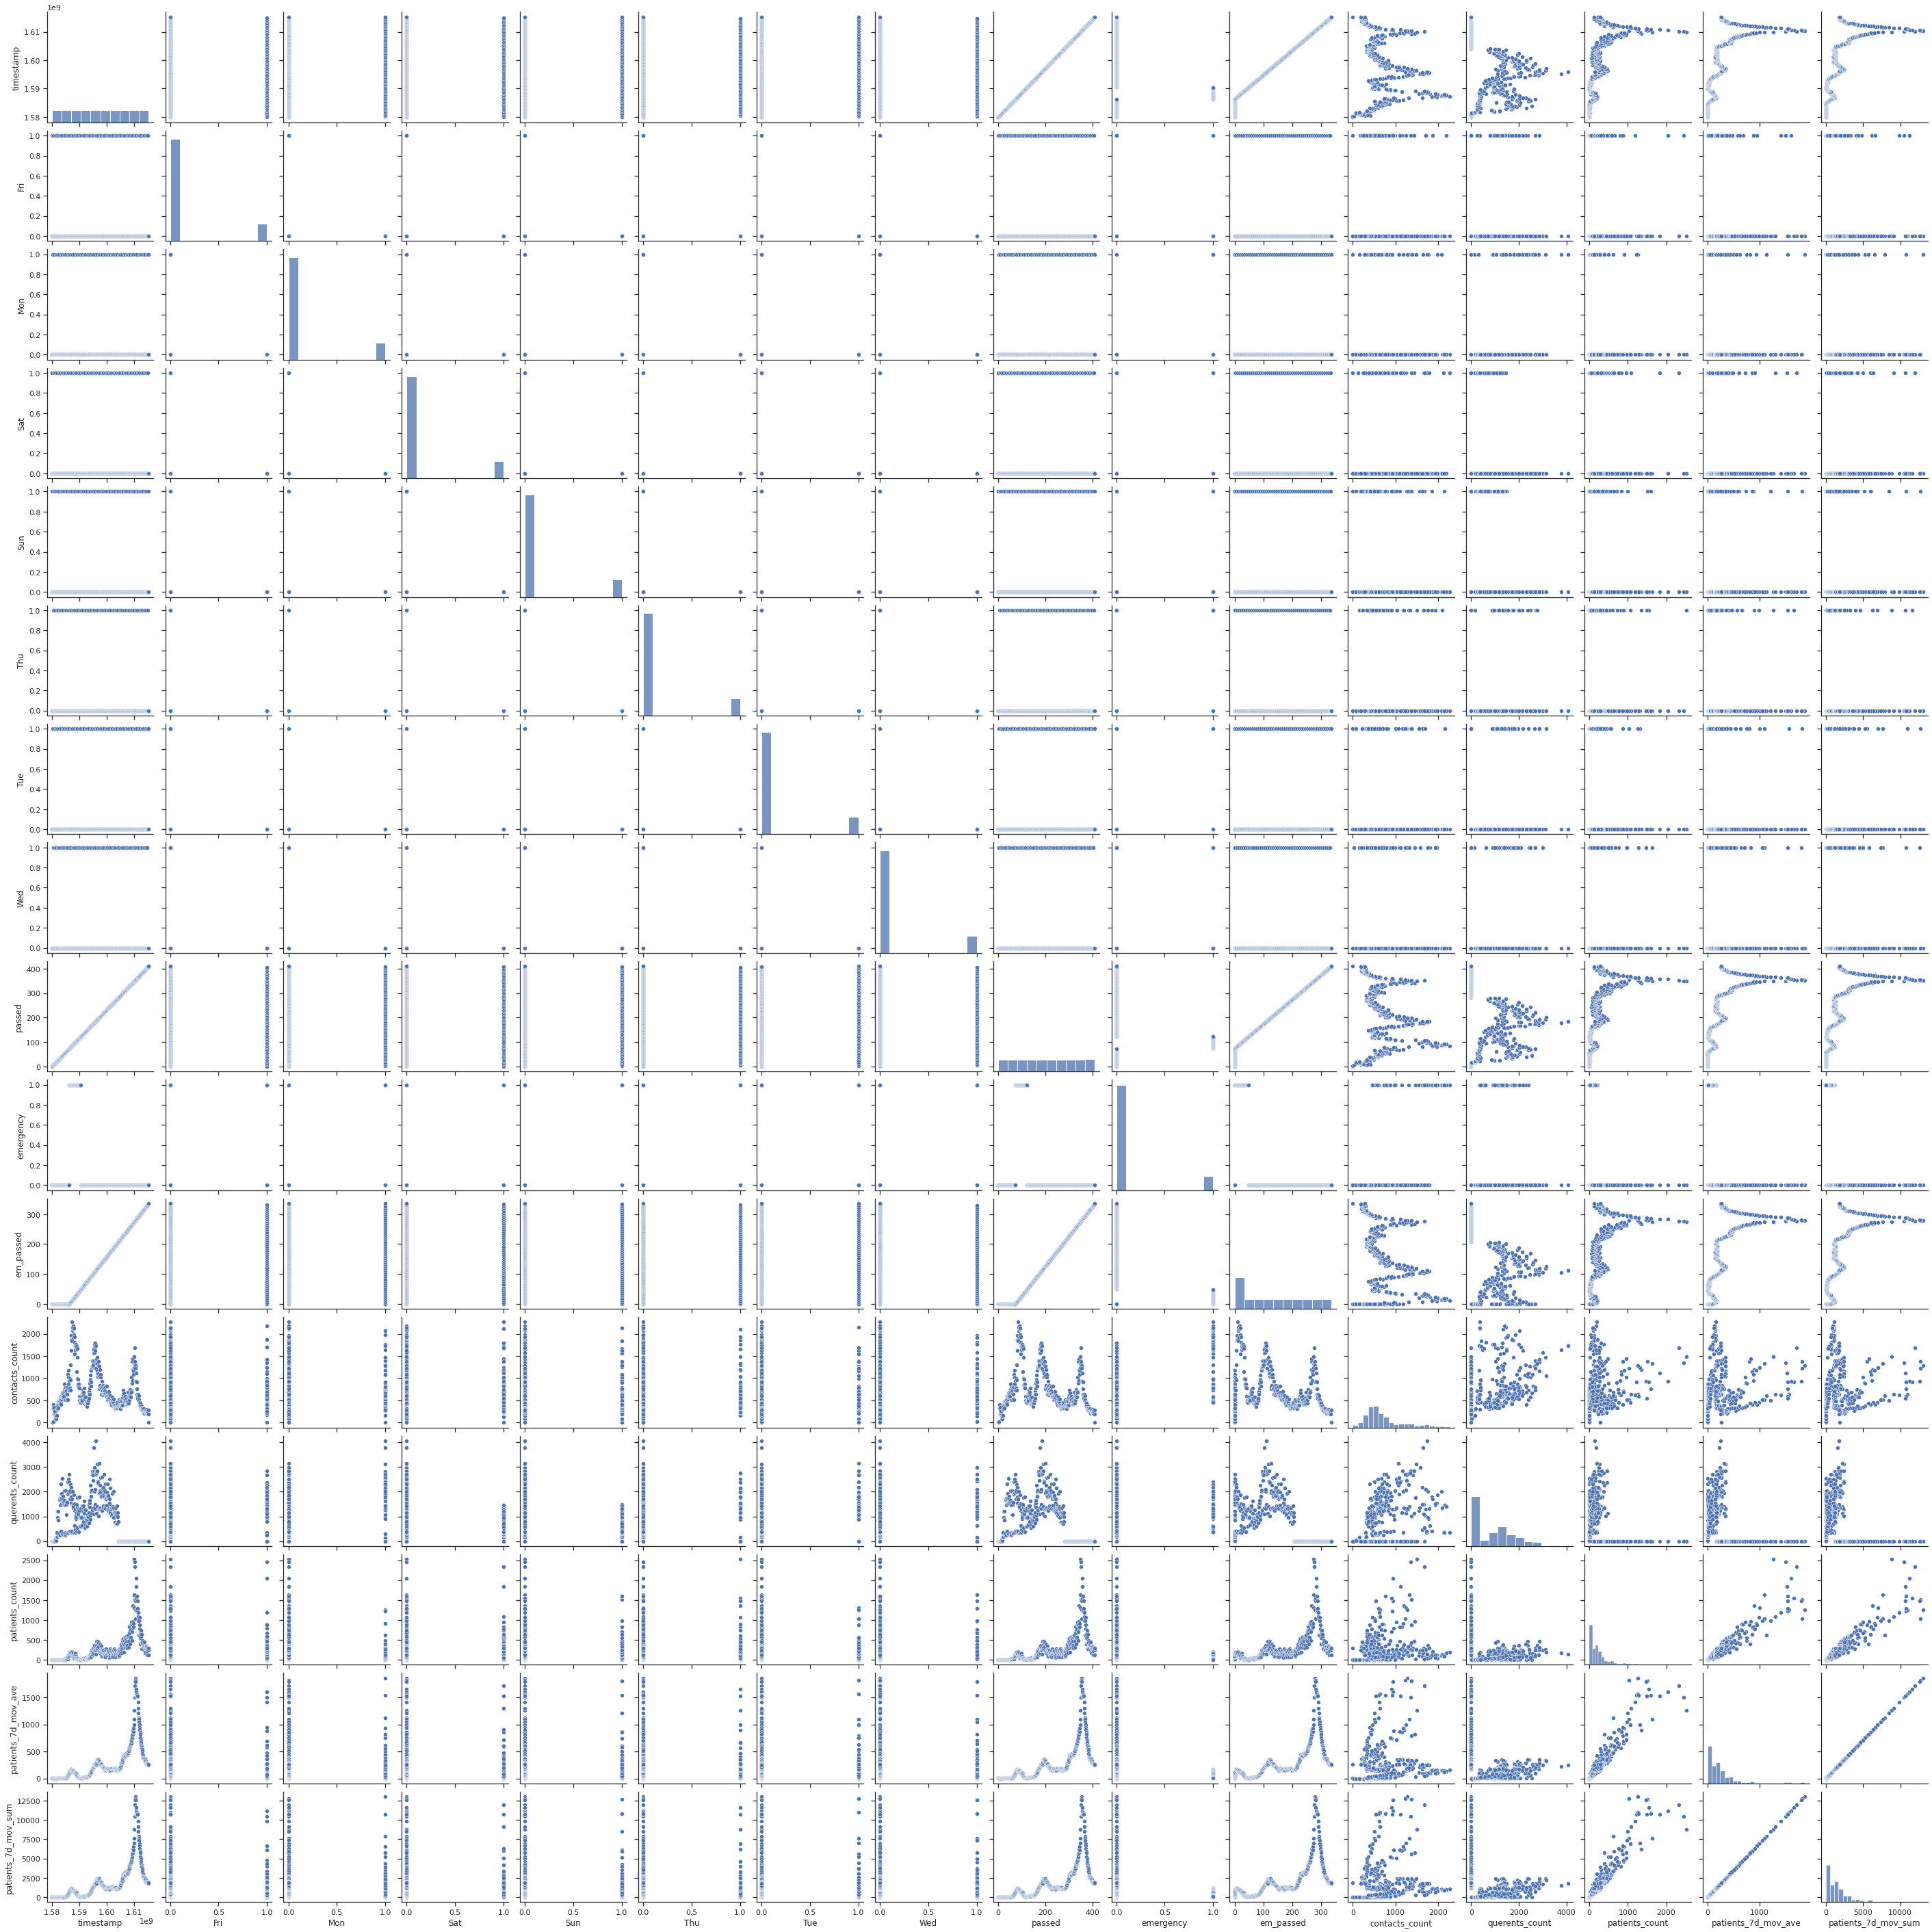

In [31]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(data=_df)

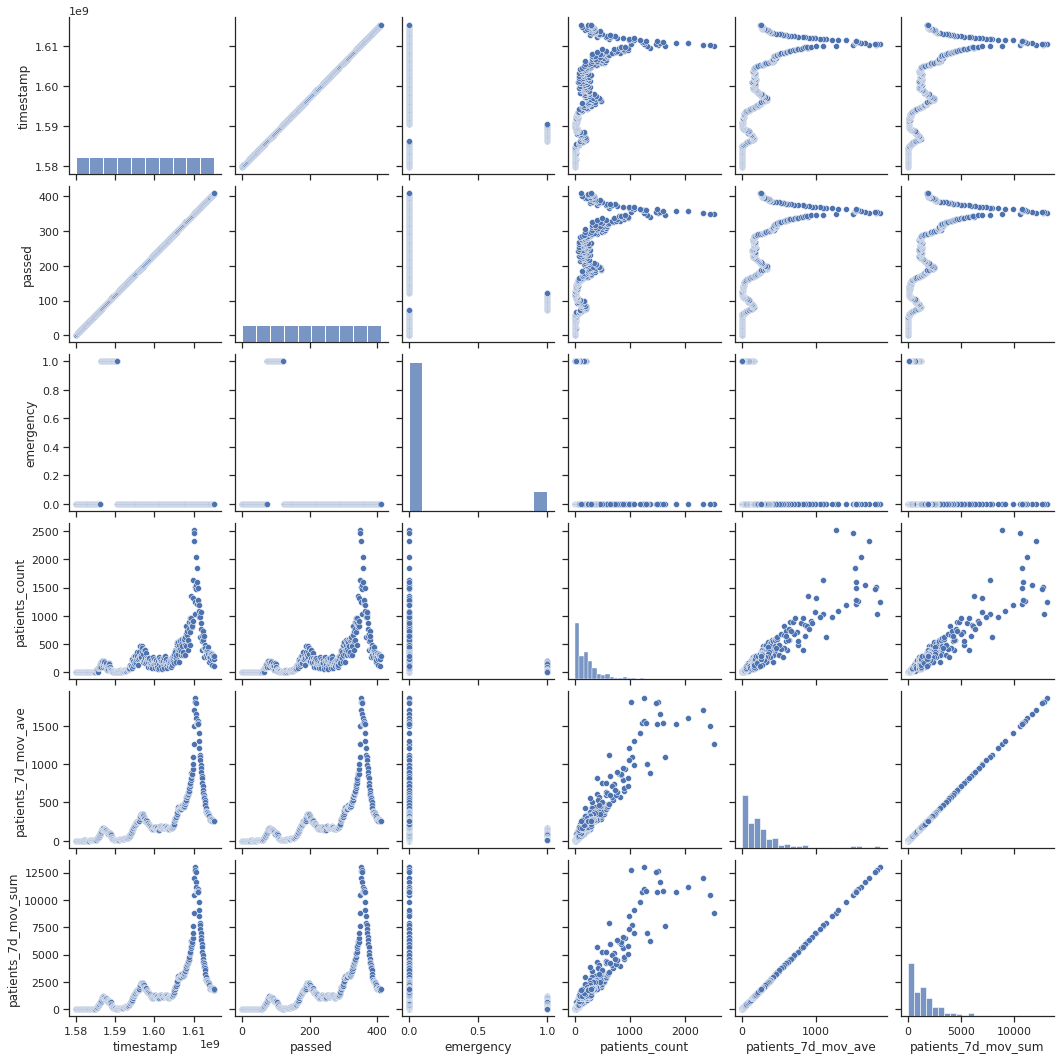

In [32]:
sns.pairplot(data=_df2)

In [33]:
!python -V

Python 3.7.10
